<a href="https://colab.research.google.com/github/docheem/BLOCK_DEV/blob/main/Bitcoin_Data_analysis_%26_Multi_sig_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bitcoin with Python

In this project, we will:

- Do exploratory Data analysis on Bitcoin
- Generate public and Private keys
- Implement a multisignature bitcoin address




In [ ]:
!pip install bitcoin

  Preparing metadata (setup.py) ... done
  Created wheel for bitcoin: filename=bitcoin-1.1.42-py3-none-any.whl size=44402 sha256=91bba46e416f4ce3cc04e990485619ad344b54618d6864eddd5f1af2830eaa4f
  Stored in directory: /root/.cache/pip/wheels/a3/98/a1/0d53f5b714680bb5dffc2db778c221b1f5c54bc4a3a779c8c5
Successfully built bitcoin


#Exploratory Data analysis (EDA)


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



pd.options.mode.chained_assignment = None


In [ ]:
import pandas as pd
from tabulate import tabulate

my_path = "/content/drive/MyDrive/market-price.csv"

btc_df = pd.read_csv(my_path)

btc_df.head()

,2022-08-01 00:00:00,23326.49
0,2022-08-02 00:00:00,23298.94
1,2022-08-03 00:00:00,22981.77
2,2022-08-04 00:00:00,22831.85
3,2022-08-05 00:00:00,22608.30
4,2022-08-06 00:00:00,23295.14


In [ ]:
btc_df.rename(columns = {'2022-08-01 00:00:00':'Date',
                         '23326.49': 'Close Price'}, inplace = True)

<

In [ ]:
btc_df.columns

Index(['Date', 'Close Price'], dtype='object')

In [ ]:
btc_df.tail()

,Date,Close Price
359,2023-07-27 00:00:00,29344.56
360,2023-07-28 00:00:00,29213.94
361,2023-07-29 00:00:00,29316.12
362,2023-07-30 00:00:00,29359.89
363,2023-07-31 00:00:00,29274.94


In [ ]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         364 non-null    object 
 1   Close Price  364 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
btc_df.isnull().sum()


Date           0
Close Price    0
dtype: int64

Data cleanup

In [ ]:
# Converting the Date column to a date-time format

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format = '%Y-%m-%d')


In [ ]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         364 non-null    datetime64[ns]
 1   Close Price  364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


Setting the index to the Date column

In [ ]:
btc_df.head()



,Date,Close Price
0,2022-08-02,23298.94
1,2022-08-03,22981.77
2,2022-08-04,22831.85
3,2022-08-05,22608.30
4,2022-08-06,23295.14


In [ ]:
#Minimum close price

btc_df.min()

Date           2022-08-02 00:00:00
Close Price               15759.61
dtype: object

In [ ]:
# Max close price
btc_df.max()

Date           2023-07-31 00:00:00
Close Price               31485.37
dtype: object

In [ ]:
btc_df.describe()


,Close Price
count,364.000000
mean,23244.578187
std,4615.683770
min,15759.610000
25%,19402.305000
50%,22973.320000
75%,27501.270000
max,31485.370000


<Axes: xlabel='Date'>

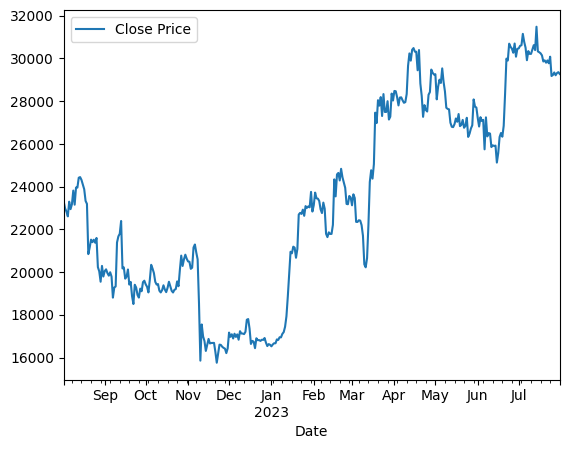

In [ ]:
#btc_df.plot('2021')
btc_df.plot(x = 'Date', y = 'Close Price', kind = 'line')


#Generate private keys and public keys

In [ ]:
# prompt: Generate a private key using the random key function

from bitcoin import *

my_private_key = random_key()


In [ ]:
print("Private Key: %s\n" % my_private_key)

Private Key: d9c6ced751fb6aea8c8d389210b75eb2aba86ee206f3c4881ca7f60d5762dfbc



In [ ]:
# Generate Public Key
my_public_key = privtopub(my_private_key)
print("Public Key: %s\n" % my_public_key)

Public Key: 045e1b6d9b292f2794ec1c1e61434431d85b025e920db414b64a430319e373fd68a03442c56095de47c257ff378a243a1a98279da13b4dc066f83bdcf8c99bf9f8



In [ ]:
# Create a bitcoin address
my_bitcoin_address = pubtoaddr(my_public_key)

print("Bitcoin Address: %s\n" % my_bitcoin_address)

Bitcoin Address: 1zuNN5xjy2UsrfAVwWUBrMBZUADM9Xiz4



#Creating a multisignature bitcoin address

- Implementing three private keys
- Implementing three public keys
- Creating the multisig

In [ ]:
# Creating Private keys

my_private_key1 = random_key()
my_private_key2 = random_key()
my_private_key3 = random_key()

print("Private Key 1: %s\n" % my_private_key1)
print("Private Key 2: %s\n" % my_private_key2)
print("Private Key 3: %s\n" % my_private_key3)
print('\n')



Private Key 1: 438dbc51d83c2ab9342f89155192fb49f525de5212b072c2f37ce6699aa8e317

Private Key 2: c6a28cca7a79e1663caf2aed64f3da52a7e57d720a96771a1787be96ba8b77b9

Private Key 3: 1b9b6aaad803834f8f1cfdf090fa680440b632b573331c8335062e544d32c11e





In [ ]:
# Creating public keys
my_public_key1 = privtopub(my_private_key1)
my_public_key2 = privtopub(my_private_key2)
my_public_key3 = privtopub(my_private_key3)

print("Public Key 1: %s\n" % my_public_key1)
print("Public Key 2: %s\n" % my_public_key2)
print("Public Key 3: %s\n" % my_public_key3)

print('\n')

Public Key 1: 04e3ffb114a93af982730d33b9d1c877b36a4db1a6d24fd6c6e054331faab8a96b7469a51133d5c54ca98f49c89d198970183cf8549142465cd3fbd850d2a52e58

Public Key 2: 04897bd43d6bd7a34281fcd6270260015bc82d1016b4c484d1eb2a917a04251a967c2a87a2ba787dbe89fed04461f539b25ba97387e00f1d03ca4c685eebde0134

Public Key 3: 0469331d7261d113c7e8ab1445af1f8e9fab04652b9c8048144e28d9b7ca01491eb8500857b7a4790f6fd397347911812bc00b0fa4a7433ff4cf7fa26eb1a2c6d9





In [ ]:
# Create Multi-signature address

my_multi_sig = mk_multisig_script(my_private_key1,
                                  my_private_key2,
                                  my_private_key3, 2,3)

my_multi_address = scriptaddr(my_multi_sig)

print("Multi signature address: %s" % my_multi_address)

Multi signature address: 361N7PAbXjiH99BteS2CJkuHqhrVCYy95E


In [ ]:
a_valid_bitcoin_address = '32KQvGr8YWcHQZwZVdyh5SE2PDbpyKVN44'

print(history(a_valid_bitcoin_address))


[]


#Blockchain API programming

In [ ]:
!pip install blockchain

  Preparing metadata (setup.py) ... done
  Created wheel for blockchain: filename=blockchain-1.4.4-py3-none-any.whl size=11490 sha256=5184b1a233b054e11798d5903dd84c4fe3c3ef4f533d8864f68565090d609cc9
  Stored in directory: /root/.cache/pip/wheels/d3/f1/74/4bb24501b714c1500ae824712f9f8fea225fd8926c3575c397
Successfully built blockchain


In [ ]:
from blockchain import exchangerates

In [ ]:
# Getting exchange rates

my_ticker = exchangerates.get_ticker()

In [ ]:
# Bitcoin rates in each currency

print('Bitcoin price in different currencies:')
print('')
for c in my_ticker:
  print(c, my_ticker[c].p15min)





Bitcoin price in different currencies:

ARS 8075865.12
AUD 44537.72
BRL 140046.99
CAD 38873.41
CHF 25553.91
CLP 24592439.55
CNY 209381.92
CZK 638162.36
DKK 198353.02
EUR 26602.7
GBP 22908.45
HKD 227158.2
HRK 122743.77
HUF 10342552.19
INR 2407638.38
ISK 3478861.38
JPY 4186035.44
KRW 37841647.46
NZD 47886.11
PLN 118353.55
RON 97554.35
RUB 2745853.4
SEK 311889.35
SGD 39073.75
THB 1004983.7
TRY 785038.82
TWD 921143.62
USD 29115.19


In [ ]:
# Getting Bitcoin value Euros

my_btc = exchangerates.to_btc('EUR', 100)

print("\n100 euros in Bitcoin: %s " % my_btc)


100 euros in Bitcoin: 0.00375902 


In [ ]:
# Getting Bitcoin value in USD

my_btc = exchangerates.to_btc('USD', 1000)

print("\n100 euros in Bitcoin: %s " % my_btc)


100 euros in Bitcoin: 0.03434633 


In [ ]:
# Get trade volume

from blockchain import statistics

In [ ]:
stats = statistics.get()

print("Bitcoin Trade Volume: %s\n" % stats.trade_volume_btc)


Bitcoin Trade Volume: 6238.63



In [ ]:
# Get the total bitcoins mined

print("The total BTC mined: %s\n" % stats.btc_mined)

The total BTC mined: 93750000000



In [ ]:
# get the bitcoin market price

print("The bitcoin marketprice is: %s\n" % stats.market_price_usd)


The bitcoin marketprice is: 29140.37

